In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def extract_sinusoidal_features(X, k):
    """
    Generate sinusoidal features from the input data for a given number of harmonics.
    
    This function creates a set of sinusoidal features based on the input `X` by computing
    the sine of multiples of the input values.
    
    Parameters:
    ----------
    X : ndarray
        A 1D numpy array of input values (e.g., [x1, x2, x3, ...]).
    
    k : int
        The number of harmonics or sinusoids to generate. Each harmonic corresponds 
        to a sine function with an increasing multiple of `X`.
    
    Returns:
    -------
    ndarray
        A 2D numpy array where each column is a sinusoidal feature corresponding to
        a different harmonic of the sine function.
    
    Example:
    --------
    If X = [0.1, 0.2, 0.3] and k = 3, the output will be:
    [
        sin(pi * X),
        sin(2 * pi * X),
        sin(3 * pi * X)
    ]
    """
    features = []
    for i in range(1, k+1):
        features.append(np.sin(np.pi * X * i))
    
    return np.concatenate(features, axis=1)

In [ ]:
def hat_w(X, y, k):
    """
    Compute the weights for a sinusoidal regression model using the normal equation.
    
    This function computes the weights `w` for a sinusoidal regression model by solving 
    the normal equation: w = (ΦᵀΦ)^(-1)Φᵀy, where:
        - `Φ` is the design matrix created from the input `X` using sinusoidal features.
        - `y` is the target vector.
        - `w` is the vector of weights that minimizes the least squares error.

    Parameters:
    ----------
    X : ndarray
        A 1D numpy array of input values (e.g., [x1, x2, x3, ...]).
    
    y : ndarray
        A 1D numpy array of target values corresponding to the input features.
    
    k : int
        The number of harmonics or sinusoidal features to generate (i.e., the number of 
        sinusoids included in the design matrix).
    
    Returns:
    -------
    ndarray
        A 1D numpy array containing the computed weights `w`. The size of `w` is equal 
        to `k`, corresponding to the number of sinusoidal features used.
    
    """
    phi = extract_sinusoidal_features(X, k)
    w = np.linalg.solve(phi.T @ phi, phi.T @ y)
    
    return w

In [ ]:
def hat_w_pinv(X, y, k):
    """
    Compute the weights for a sinusoidal regression model using the pseudoinverse.

    This function calculates the weights `w` for a sinusoidal regression model 
    by using the normal equation with the pseudoinverse:
        w = (ΦᵀΦ)^(-1)Φᵀy
    
    The pseudoinverse is used to handle cases where the matrix `(ΦᵀΦ)` may be singular or non-invertible.

    Parameters:
    ----------
    X : ndarray
        A 1D numpy array of input values (e.g., [x1, x2, x3, ...]).
    
    y : ndarray
        A 1D numpy array of target values corresponding to the input features.
    
    k : int
        The number of harmonics or sinusoidal features to generate (i.e., the number of 
        sinusoids included in the design matrix).
    
    Returns:
    -------
    ndarray
        A 1D numpy array containing the computed weights `w`. The size of `w` is equal 
        to `k`, corresponding to the number of sinusoidal features used.
    
    """
    phi = extract_sinusoidal_features(X, k)
    w = np.linalg.pinv(phi.T @ phi) @ phi.T @ y
    
    return w

In [ ]:
def predict_sinusoidal(X, w, k):
    """
    This function computes predictions `y_pred` for the given input `X` using the 
    precomputed weights `w` from the sinusoidal regression model. The predictions 
    are made based on the sinusoidal features of `X`.

    Parameters:
    ----------
    X : ndarray
        A 1D numpy array of input values (e.g., [x1, x2, x3, ...]).
    
    w : ndarray
        A 1D numpy array of weights computed from a previous fitting step (e.g., from `hat_w_pinv`).
    
    k : int
        The number of harmonics or sinusoidal features used in the model.
    
    Returns:
    -------
    ndarray
        A 1D numpy array of predicted values based on the input features and the learned weights.
    
    """
    phi = extract_sinusoidal_features(X, k)
    
    return phi @ w

In [ ]:
def g_sigma(x, sigma=0.07):
    """
    Generate noisy sinusoidal data with added Gaussian noise.

    This function computes the sine-squared of `x` and adds Gaussian noise with
    standard deviation `sigma` to the result.

    Parameters:
    ----------
    x : ndarray
        A 1D numpy array of input values (e.g., [x1, x2, x3, ...]).
    
    sigma : float, optional
        The standard deviation of the Gaussian noise to be added to the sine-squared values. 
        Default value is 0.07.
    
    Returns:
    -------
    ndarray
        A 1D numpy array of noisy output values. Each element is the sine-squared of 
        the corresponding `x` value with added Gaussian noise.

    """
    sin_squared = np.sin(2 * np.pi * x)**2
    epsilon = np.random.normal(0, sigma, size=x.shape)
    
    return sin_squared + epsilon

In [ ]:
# Generate training data
x_train = np.random.uniform(0, 1, 30).reshape(-1, 1)
y_train = g_sigma(x_train, sigma=0.07)

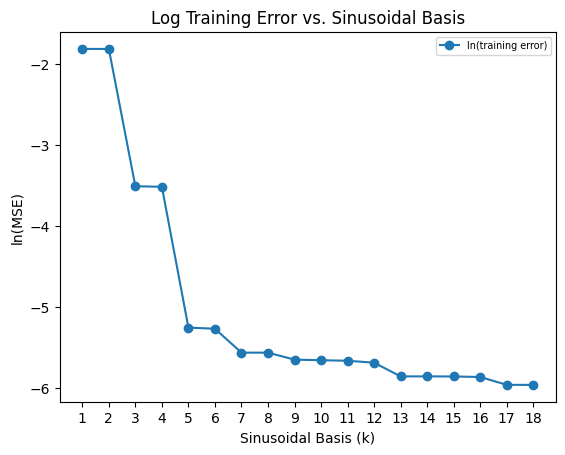

In [17]:
# (b)
training_errors = []

for k in range(1,19):
    w = hat_w(x_train, y_train, k)
    
    y_fitted = predict_sinusoidal(x_train, w, k)
    
    mse = np.mean((y_train - y_fitted)**2)
    training_errors.append(mse)
    
ln_training_errors = np.log(training_errors)

plt.plot(range(1, 19), ln_training_errors, marker='o', label="ln(training error)")

plt.xlabel('Sinusoidal Basis (k)')
plt.ylabel('ln(MSE)')
plt.title('Log Training Error vs. Sinusoidal Basis')
plt.xticks(range(1, 19))
plt.legend(fontsize='x-small')
plt.show()

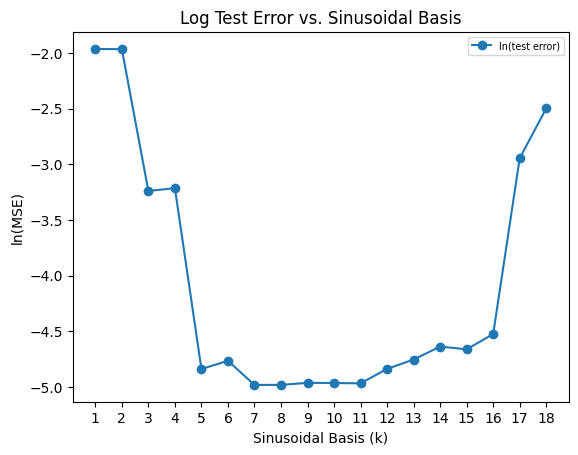

In [9]:
# (c)
x_test = np.random.uniform(0, 1, 1000).reshape(-1, 1)
y_test = g_sigma(x_test, sigma=0.07)

test_errors = []

for k in range(1, 19):
    w_train = hat_w(x_train, y_train, k)
    
    phi_test = extract_sinusoidal_features(x_test, k)
    
    y_test_pred = phi_test @ w_train
    
    mse_test = np.mean((y_test - y_test_pred)**2)
    test_errors.append(mse_test)

ln_test_errors = np.log(test_errors)

plt.plot(range(1, 19), ln_test_errors, marker='o', label="ln(test error)")
plt.xlabel('Sinusoidal Basis (k)')
plt.ylabel('ln(MSE)')
plt.title('Log Test Error vs. Sinusoidal Basis')
plt.xticks(range(1, 19))
plt.legend(fontsize='x-small')
plt.show()

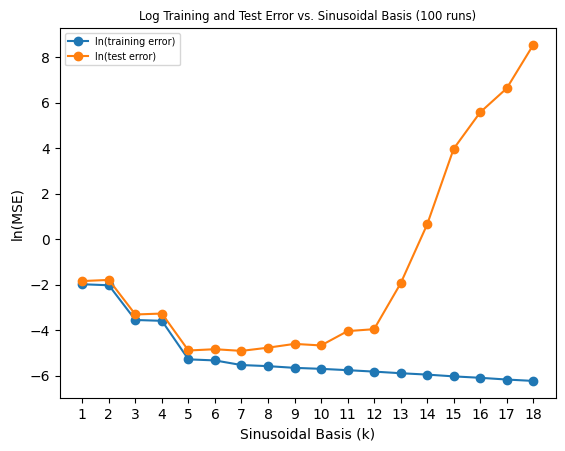

In [18]:
# (d)
num_runs = 100
training_errors = np.zeros(18)
test_errors = np.zeros(18)

X_test = np.random.uniform(0, 1, 1000).reshape(-1, 1)
Y_test = g_sigma(X_test, sigma=0.07)

for run in range(num_runs):

    X_train = np.random.uniform(0, 1, 30).reshape(-1, 1)
    Y_train = g_sigma(X_train, sigma=0.07)

    for k in range(1, 19):
        
        # Pseudoinverse
        W_train = hat_w_pinv(X_train, Y_train, k)

        Y_train_pred = predict_sinusoidal(X_train, W_train, k)
        Y_test_pred = predict_sinusoidal(X_test, W_train, k)

        training_errors[k-1] += np.mean((Y_train - Y_train_pred)**2)
        test_errors[k-1] += np.mean((Y_test - Y_test_pred)**2)

training_errors /= num_runs
test_errors /= num_runs

ln_training_errors = np.log(training_errors)
ln_test_errors = np.log(test_errors)

plt.plot(range(1, 19), ln_training_errors, marker='o', label="ln(training error)")
plt.plot(range(1, 19), ln_test_errors, marker='o', label="ln(test error)")
plt.xlabel('Sinusoidal Basis (k)')
plt.ylabel('ln(MSE)')
plt.title(f'Log Training and Test Error vs. Sinusoidal Basis ({num_runs} runs)', fontsize='small')
plt.xticks(range(1, 19))
plt.legend(fontsize='x-small')
plt.show()